In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/iot_telemetry_data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


(None,
              ts             device        co   humidity  light       lpg  \
 0  1.594512e+09  b8:27:eb:bf:9d:51  0.004956  51.000000  False  0.007651   
 1  1.594512e+09  00:0f:00:70:91:0a  0.002840  76.000000  False  0.005114   
 2  1.594512e+09  b8:27:eb:bf:9d:51  0.004976  50.900000  False  0.007673   
 3  1.594512e+09  1c:bf:ce:15:ec:4d  0.004403  76.800003   True  0.007023   
 4  1.594512e+09  b8:27:eb:bf:9d:51  0.004967  50.900000  False  0.007664   
 
    motion     smoke       temp  
 0   False  0.020411  22.700000  
 1   False  0.013275  19.700001  
 2   False  0.020475  22.600000  
 3   False  0.018628  27.000000  
 4   False  0.020448  22.600000  )

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

missing_values = data.isnull().sum()

# Handling categorical variables - 'device' column
label_encoder = LabelEncoder()
data['device_encoded'] = label_encoder.fit_transform(data['device'])

# Normalizing the numerical features
numerical_features = ['co', 'humidity', 'lpg', 'smoke', 'temp']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the updated dataset and missing values information
updated_data_head = data.head()
missing_values, updated_data_head

(ts                0
 device            0
 co                0
 humidity          0
 light             0
 lpg               0
 motion            0
 smoke             0
 temp              0
 device_encoded    0
 dtype: int64,
              ts             device        co  humidity  light       lpg  \
 0  1.594512e+09  b8:27:eb:bf:9d:51  0.253670 -0.836820  False  0.286471   
 1  1.594512e+09  00:0f:00:70:91:0a -1.438976  1.362631  False -1.469927   
 2  1.594512e+09  b8:27:eb:bf:9d:51  0.269729 -0.845618  False  0.301986   
 3  1.594512e+09  1c:bf:ce:15:ec:4d -0.188651  1.433013   True -0.148041   
 4  1.594512e+09  b8:27:eb:bf:9d:51  0.262810 -0.845618  False  0.295303   
 
    motion     smoke      temp  device_encoded  
 0   False  0.280867  0.091172               2  
 1   False -1.465637 -1.020621               0  
 2   False  0.296495  0.054112               2  
 3   False -0.155499  1.684742               1  
 4   False  0.289763  0.054112               2  )

In [8]:
from sklearn.manifold import Isomap

# ISOMAP parameters
n_neighbors = 5  # number of neighbors to consider for each point
n_components = 2  # number of dimensions to reduce to
# Sampling a subset of 1000 rows from the dataset to reduce its size
sampled_data = data.sample(n=10000, random_state=42)

# Selecting the features for dimensionality reduction from the sampled data
features_for_reduction_sampled = sampled_data[numerical_features + ['device_encoded']]

# Reapplying ISOMAP with the sampled data
isomap_sampled = Isomap(n_neighbors=n_neighbors, n_components=n_components)
reduced_data_sampled = isomap_sampled.fit_transform(features_for_reduction_sampled)

# Converting the reduced data into a DataFrame for better visualization
reduced_data_sampled_df = pd.DataFrame(reduced_data_sampled, columns=['ISOMAP1', 'ISOMAP2'])

reduced_data_sampled_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 21 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-package

,ISOMAP1,ISOMAP2
0,0.494986,-4.496335
1,-2.436585,0.733438
2,0.581986,-1.847366
3,3.898057,1.625474
4,-2.138507,-0.009836


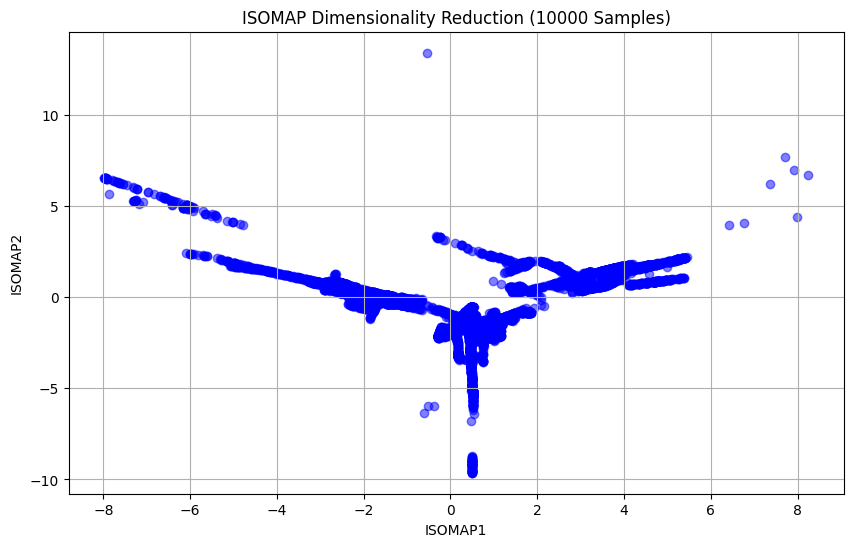

In [9]:
import matplotlib.pyplot as plt

# Data Visualization of the reduced data
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_sampled_df['ISOMAP1'], reduced_data_sampled_df['ISOMAP2'], c='blue', alpha=0.5)
plt.title("ISOMAP Dimensionality Reduction (10000 Samples)")
plt.xlabel("ISOMAP1")
plt.ylabel("ISOMAP2")
plt.grid(True)
plt.show()